In [2]:
!pip install inference -q

In [3]:
!pip install ultralytics -q

In [15]:
!brew install cmake ninja


==> Downloading https://formulae.brew.sh/api/formula.jws.json
==> Downloading https://formulae.brew.sh/api/cask.jws.json
==> Downloading https://ghcr.io/v2/homebrew/core/cmake/manifests/4.0.1
######################################################################### 100.0%
==> Fetching cmake
==> Downloading https://ghcr.io/v2/homebrew/core/cmake/blobs/sha256:5fc195bfee6a
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/ninja/manifests/1.12.1-1
######################################################################### 100.0%
==> Fetching ninja
==> Downloading https://ghcr.io/v2/homebrew/core/ninja/blobs/sha256:977f9c2ad831
######################################################################### 100.0%
==> Pouring cmake--4.0.1.arm64_sequoia.bottle.tar.gz
==> Caveats
To install the CMake documentation, run:
  brew install cmake-docs

Emacs Lisp files have been installed to:
  /opt/homebrew/share/emacs/site-lis

In [16]:
!pip install rfdetr

  Using cached rfdetr-1.1.0-py3-none-any.whl.metadata (26 kB)
  Using cached pycocotools-2.0.8-cp312-cp312-macosx_10_9_universal2.whl.metadata (1.1 kB)
  Using cached fairscale-0.4.13.tar.gz (266 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached timm-1.0.15-py3-none-any.whl.metadata (52 kB)
  Using cached peft-0.15.2-py3-none-any.whl.metadata (13 kB)
  Using cached ninja-1.11.1.4-py3-none-macosx_10_9_universal2.whl.metadata (5.0 kB)
  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached pylabel-0.1.55-py3-none-any.whl.metadata (3.8 kB)
  Using cached onnx-1.17.0-cp312-cp312-macosx_12_0_universal2.whl.metadata (16 kB)
  Using cached onnxsim-0.4.36.tar.gz (21.0 MB)
  Preparing metadata (setup.py) ... done
Using cached ninja-1.11.1.4-py3-none-macosx_10_9_universal2.whl (279 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [17]:
import supervision as sv
from PIL import Image
from rfdetr import RFDETRBase

# Load the model with your downloaded weights
model = RFDETRBase()
model.load_weights(f"{home}/downloads/weightsjake.pt")  # Replace with your weights file path

# Load an image
image = Image.open(f"{home}/SubwaySurfers/train_screenshots/frame_0000.jpg")  # Replace with your image path

# Run inference
detections = model.predict(image, threshold=0.5)

# Visualize the results
annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections)

# Display the image
sv.plot_image(annotated_image)

ModuleNotFoundError: No module named 'rfdetr'

ModelDependencyMissing: Your `inference` configuration does not support PaliGemma model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support Florence2 model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does

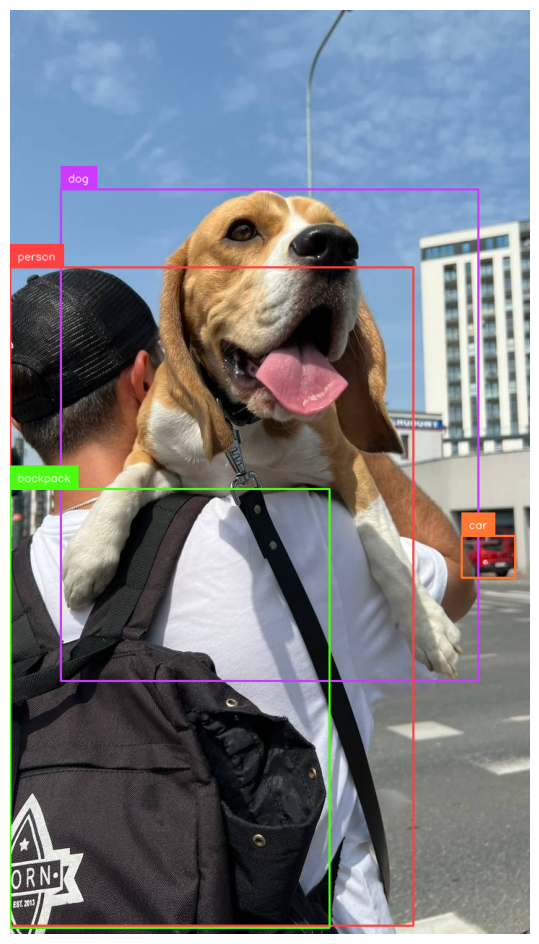

KeyboardInterrupt: 

In [9]:
import os
import supervision as sv
from inference import get_model
from PIL import Image
from io import BytesIO
import requests

response = requests.get("https://media.roboflow.com/dog.jpeg")

if response.status_code == 200:
    image_data = BytesIO(response.content)

    image = Image.open(image_data)

model = get_model("rfdetr-base")

predictions = model.infer(image, confidence=0.5)[0]

detections = sv.Detections.from_inference(predictions)

labels = [prediction.class_name for prediction in predictions.predictions]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

sv.plot_image(annotated_image)

annotated_image.save("annotated_image_base.jpg")

model = get_model("rfdetr-large")

predictions = model.infer(image, confidence=0.5)[0]

detections = sv.Detections.from_inference(predictions)

labels = [prediction.class_name for prediction in predictions.predictions]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

sv.plot_image(annotated_image)

annotated_image.save("annotated_image_large.jpg")